### Import the GitHub Project

In [19]:
!rm -rf project #remove if it already exists 
!git clone https://github.com/B4Farouk/smpl-dr-clip project
!rm -rf sample_data

Cloning into 'project'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 528 (delta 102), reused 158 (delta 81), pack-reused 334
Receiving objects: 100% (528/528), 92.22 MiB | 18.05 MiB/s, done.
Resolving deltas: 100% (296/296), done.


### Install Dependencies
---
- pytorch (1.12.1)
- torchvision (0.13.1)
---
- pytorch3d
---
- SMPL
- chumpy

In [2]:
import os
import sys

In [3]:
# install torch
try:
    import torch
    if torch.__version__ != "1.12.1":
      raise ModuleNotFoundError()
except ModuleNotFoundError:
    !pip install torch==1.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install torchvision
try:
    import torchvision
    if torchvision.__version__ != "0.13.1":
      raise ModuleNotFoundError()
except ModuleNotFoundError:
    !pip install torchvision==0.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# install pytorch3d
import torch, torchvision

try:
    import pytorch3d
except ModuleNotFoundError:
    if torch.__version__.startswith("1.12.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install pytorch3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221122-py3-none-any.whl size=61484 sha256=409dece29471c79cc04fcf082f796059ae88455dae333348f45a3e22c7bed666
  Stored in directory: /root/.cache/pip/wheels/15/6e/e3/602889ca9c5c55020f8d205066445ac5b1b96df59f75170ca0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=4a6d8fbe3ded57e25cfbf3655d5e973281716c43cde9a26066da84494b2300f9
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py38_cu113_pyt1121/download.html
     |████████████████████████████████| 47.2 MB 825 kB/s 


In [6]:
# install SMPL dependencies
!pip install smplpytorch
!pip install chumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=776cb14705733c3402ba21435d9a04c6c62af97c390f631c3bdff37da694fea8
  Stored in directory: /root/.cache/pip/wheels/d9/a2/b8/b8aeeeaeb01b5002085156add1aed832f2fb03e79d0f22dfed
Successfully built chumpy


In [7]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-b_i8tpss
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-b_i8tpss
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=0f092b8e3a2c7fc19040b1dc9f44c2bad98dc156181cdb9d0758ddbedf5f5eca
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_aps3k7/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


### GPU

In [8]:
torch.cuda.is_available()

True

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [10]:
# GPU or CPU
gpu, cpu = None, None
if torch.cuda.is_available():
    gpu = torch.device("cuda:0")
    torch.cuda.set_device(gpu)
else:
    cpu = torch.device("cpu")
dev = gpu if gpu is not None else cpu
dev

device(type='cuda', index=0)

### Local Imports 

In [20]:
from project.smpl import SMPLwrapper, mesh_from
from project.textures import TexturesFactory

from project.rendering import CamerasFactory, Renderer

#from project.clipwrapper import CLIPwrapper
from project.clipmodel import CLIPwrapper

from project.plots import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CLIP

In [21]:
import clip
from PIL import Image

import torchvision.transforms as transforms

res = 224

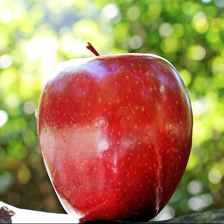

In [22]:
apple_img = Image.open("apple.png")
apple_img = apple_img.resize((res, res))
apple_tensor = transforms.ToTensor()(apple_img)
apple_img

In [23]:
juliette_clip_model = CLIPwrapper(prompt="A red apple")

In [24]:
sim = juliette_clip_model.get_cos_sim(apple_tensor)
print(sim.item())
# print(dif.tolist())

0.301513671875


In [25]:
juliette_clip_model.change_prompt_to("An apple")
sim = juliette_clip_model.get_cosine_similarity(apple_tensor)
sim.item()

AttributeError: ignored

In [26]:
juliette_clip_model.change_prompt_to("An apple with a green background")
sim = juliette_clip_model.get_cos_sim(apple_tensor)
sim.item()

0.276611328125

In [27]:
juliette_clip_model.change_prompt_to("A man")
sim = juliette_clip_model.get_cos_sim(apple_tensor)
sim.item()

0.1895751953125

In [28]:
juliette_clip_model.change_prompt_to("A red and green woman")
sim = juliette_clip_model.get_cos_sim(apple_tensor)
sim.item()

0.2177734375

Black and white apple

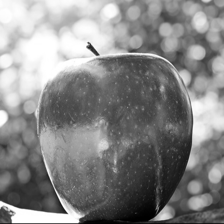

In [29]:
a_bw_img = Image.open("apple-bw.png")
a_bw_img = a_bw_img.resize((res, res))
a_bw_t = transforms.ToTensor()(a_bw_img)
a_bw_img

In [30]:
juliette_clip_model.change_prompt_to("An apple")
sim = juliette_clip_model.get_cos_sim(a_bw_t)
sim.item()

0.2802734375

In [31]:
juliette_clip_model.change_prompt_to("A red apple")
sim = juliette_clip_model.get_cos_sim(a_bw_t)
sim.item()

0.26611328125

In [32]:
juliette_clip_model.change_prompt_to("A grey apple")
sim = juliette_clip_model.get_cos_sim(a_bw_t)
sim.item()

0.286865234375

In [33]:
juliette_clip_model.change_prompt_to("khvr386fzvqp9u'489713974à$è$à$1§")
sim = juliette_clip_model.get_cos_sim(a_bw_t)
sim.item()

0.2027587890625

MAN arms spread

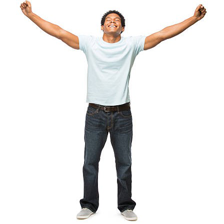

In [34]:
mas_img = Image.open("man_arms_spread.jpg")
mas_img = mas_img.resize((res, res))
mas_t = transforms.ToTensor()(mas_img)
mas_img

In [35]:
juliette_clip_model.change_prompt_to(prompt="A man with spreaded arms")
sim = juliette_clip_model.get_cos_sim(mas_t)
print(sim.item())

0.280517578125


In [36]:
juliette_clip_model.change_prompt_to("happy man")
sim = juliette_clip_model.get_cos_sim(mas_t)
print(sim.item())

0.24560546875


black and white

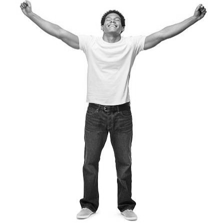

In [37]:
mas_bw_img = Image.open("man_arms_spread_bw.jpg")
mas_bw_img = mas_bw_img.resize((res, res))
mas_bw_t = transforms.ToTensor()(mas_bw_img)
mas_bw_img

In [38]:
juliette_clip_model.change_prompt_to("A man with spreaded arms")
sim = juliette_clip_model.get_cos_sim(mas_bw_t)
print(sim.item())

0.271240234375


In [39]:
juliette_clip_model.change_prompt_to("A man lying down")
sim = juliette_clip_model.get_cos_sim(mas_bw_t)
print(sim.item())

0.2457275390625


man lying down

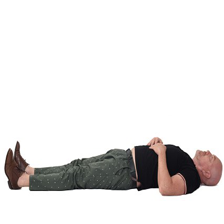

In [40]:
mld_img = Image.open("man_lying_down_2.jpg")
mld_img = mld_img.resize((res, res))
mld_t = transforms.ToTensor()(mld_img)
mld_img

In [41]:
juliette_clip_model.change_prompt_to("A man lying down with a black shirt")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.31494140625


In [42]:
juliette_clip_model.change_prompt_to("A white man lying down with dark cloth")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.30615234375


In [43]:
juliette_clip_model.change_prompt_to("A man standing up")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.2362060546875


In [44]:
juliette_clip_model.change_prompt_to("A man")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.2220458984375


In [45]:
juliette_clip_model.change_prompt_to("A dead man")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.2410888671875


In [46]:
juliette_clip_model.change_prompt_to("A man lying down")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.2978515625


In [47]:
juliette_clip_model.change_prompt_to("A man sitting down")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.256103515625


In [48]:
juliette_clip_model.change_prompt_to("A man looking at the sky")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.2252197265625


In [49]:
juliette_clip_model.change_prompt_to("A man on his back")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.27197265625


In [50]:
juliette_clip_model.change_prompt_to("A man with his legs up")
sim = juliette_clip_model.get_cos_sim(mld_t)
print(sim.item())

0.271240234375
